# Processing Sample data from R

Format file changer

**Original code:** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Conceptualization & Methodological review :**  [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Updates, Modifications:** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Funding:** The World Bank (contract number: 7190531), [KTH](https://www.kth.se/en/itm/inst/energiteknik/forskning/desa/welcome-to-the-unit-of-energy-systems-analysis-kth-desa-1.197296)

In [17]:
# Importing necessary modules

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
import os
from earthpy import clip as cl
from shapely.geometry import Point, Polygon
%matplotlib inline

In [18]:
path_shp = r"N:\Agrodem\Survey_Data"
name_shp = "Survey_Maize_Short_Reproj.gpkg"
survey_point_gdf = gpd.read_file(path_shp + "\\" + name_shp, layer='Survey_Maize_Short_Reproj')

In [19]:
# Reproject data in to Ordnance Survey GB coordinates
survey_point_gdf = survey_point_gdf.to_crs({'init': 'epsg:4326'})

In [20]:
survey_point_gdf.head(5)

,uid,BASICA_AREA,Zone,total_volume_prod,geometry
0,1.0,0.114,36.0,600,POINT (31.14628 -15.68921)
1,5.0,0.51480000000000004,36.0,250,POINT (31.12202 -15.69534)
2,7.0,0.27279999999999999,36.0,180,POINT (31.11953 -15.69567)
3,9.0,0.19239999999999999,36.0,100,POINT (31.12210 -15.69485)
4,11.0,0.216,36.0,60,POINT (31.09769 -15.69701)


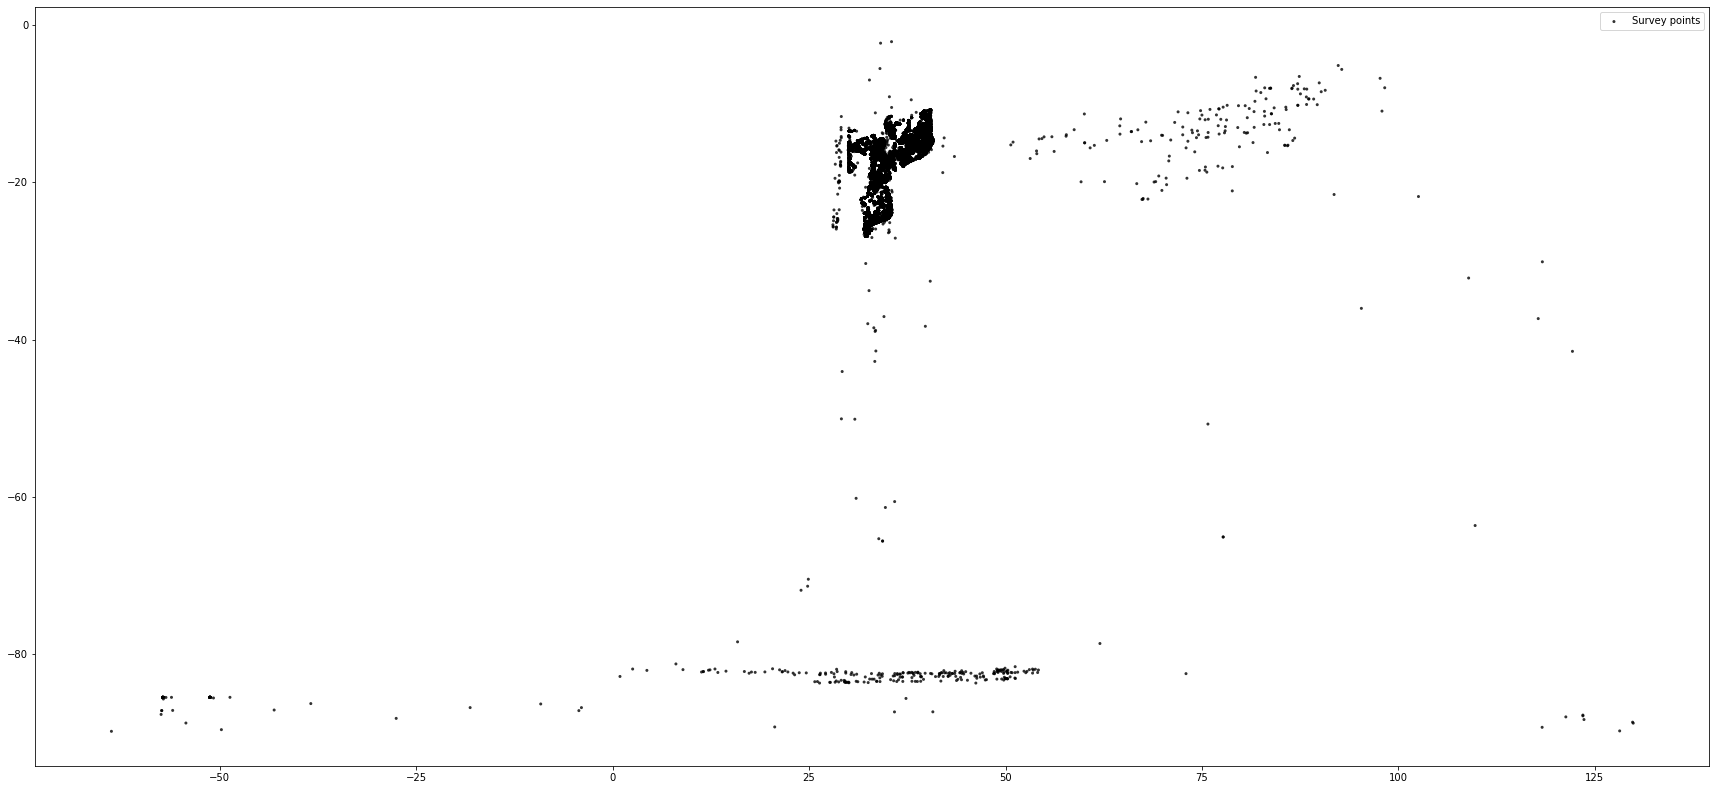

In [21]:
# Plot the data
fig, ax = plt.subplots(figsize=(30, 30))
#admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
survey_point_gdf.plot(ax=ax, figsize=(20, 20), alpha=0.8, color='black', edgecolor='none', marker='.', label='Survey points', legend = True)
ax.set_aspect('equal', 'box')
leg = ax.legend()

# Save plot as figure 
#plt.savefig('Maize_Harv_Area_2017.png', bbox_inches='tight')

In [16]:
#Save as csv
path = r"N:\Agrodem\Survey_Data"
name_of_flat_input_file = "Survey_Points_Maize_epsg_4326"

survey_point_gdf.to_csv(os.path.join(path,"{c}.csv".format(c=name_of_flat_input_file)), index=False)

In [23]:
#Save as gpkg
path = r"N:\Agrodem\Survey_Data"
name_of_flat_input_file = "Survey_Points_Maize_epsg_4326"

survey_point_gdf.to_file(os.path.join(path,"{c}.gpkg".format(c=name_of_flat_input_file)),  driver="GPKG")
#survey_point_gdf.to_file("output.gpkg", driver="GPKG")